In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
from glob import glob
from os import path

In [2]:
from skimage.util import *

In [3]:
def is_low_contrast(obj_image, fraction_threshold, lower_percentile,
                    upper_percentile, method='linear'):
    
    dlimits = dtype_limits(obj_image, clip_negative=False)
    limits = numpy.percentile(obj_image, [lower_percentile, upper_percentile])
    
    ratio = (limits[1] - limits[0]) / (dlimits[1] - dlimits[0])

    return ratio < fraction_threshold, ratio

In [4]:
def is_low_contrast_image(obj_image, fraction_threshold=0.2, lower_percentile=10, upper_percentile=90):
    low_contrast = False

    low_contrast = is_low_contrast(obj_image, 
                                   fraction_threshold=fraction_threshold, 
                                   lower_percentile=lower_percentile, 
                                   upper_percentile=upper_percentile)
    return low_contrast

In [22]:
def get_contrast_slope_ratios(obj_image):
    obj_flat = obj_image.flatten()
    ratio = numpy.diff(obj_flat)

    ratio = numpy.unique(ratio)

    obj_flat_norm = (ratio[1:] - ratio[1:].min()) / (ratio[1:].max() - ratio[1:].min())

    return obj_flat_norm

<h3>環境設置</h3>

In [6]:
image_folder = 'D:/Projects/ComputerVision/AutoEncoder/Fish/images/objects/faint'
image_files = [ f[len(image_folder) + 1:] for f in sorted(glob('%s/F*.jpg' % (image_folder)))]

image_files[:5]

['F000234-00001.jpg',
 'F000235-00001.jpg',
 'F000236-00000.jpg',
 'F000237-00001.jpg',
 'F000238-00001.jpg']

In [7]:
'F000234-00001.jpg'[:-4]

'F000234-00001'

<h3>轉換資料格式</h3>

In [8]:
obj_images = dict()

for image_file in image_files:
    _image_file = '%s/%s' % (image_folder, image_file)

    my_image = cv2.imread(_image_file, cv2.IMREAD_GRAYSCALE)
    _image = cv2.resize(my_image.copy(), (120, 120), interpolation=cv2.INTER_CUBIC)

    obj_images[image_file[:-4]] = _image
    
my_image_list = numpy.array(list(obj_images.values()))

<h3>邊界直方圖均衡化處裡</h3>

In [9]:
my_countour_list = []
my_contour_image_list = []

img_blank = numpy.ones(my_image_list[0].shape, numpy.uint8)

for obj_name in obj_images:
    my_image = obj_images[obj_name]    
    my_image = cv2.equalizeHist(my_image.copy())

    ret, thresh = cv2.threshold(my_image, 127, 255, cv2.THRESH_BINARY_INV)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    my_countour_list.append(contours)
    
    _image = img_blank.copy()

    for contour in contours:
        cv2.drawContours(_image, contour, -1, (0, 0, 255), 1)

    my_contour_image_list.append(_image)

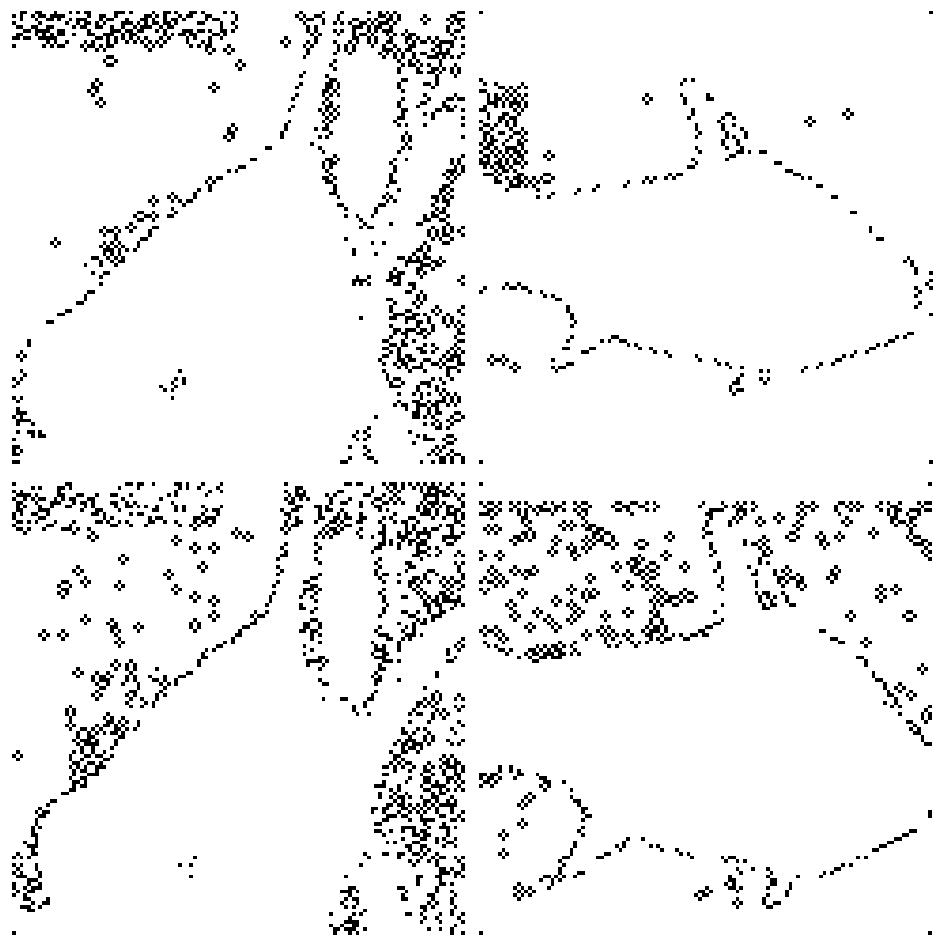

In [10]:
fig, ax = plt.subplots(dpi=120, figsize=(8, 8), nrows=2, ncols=2)

for row in range(2):
    for col in range(2):
        my_image = my_contour_image_list[numpy.random.randint(0, len(my_contour_image_list) - 1)] 
        _image = my_image.copy()
      
        ax[row][col].imshow(_image, cmap='gray')
        ax[row][col].axis('off')
        
        my_contour_image_list.append(_image)

plt.tight_layout()
plt.show()

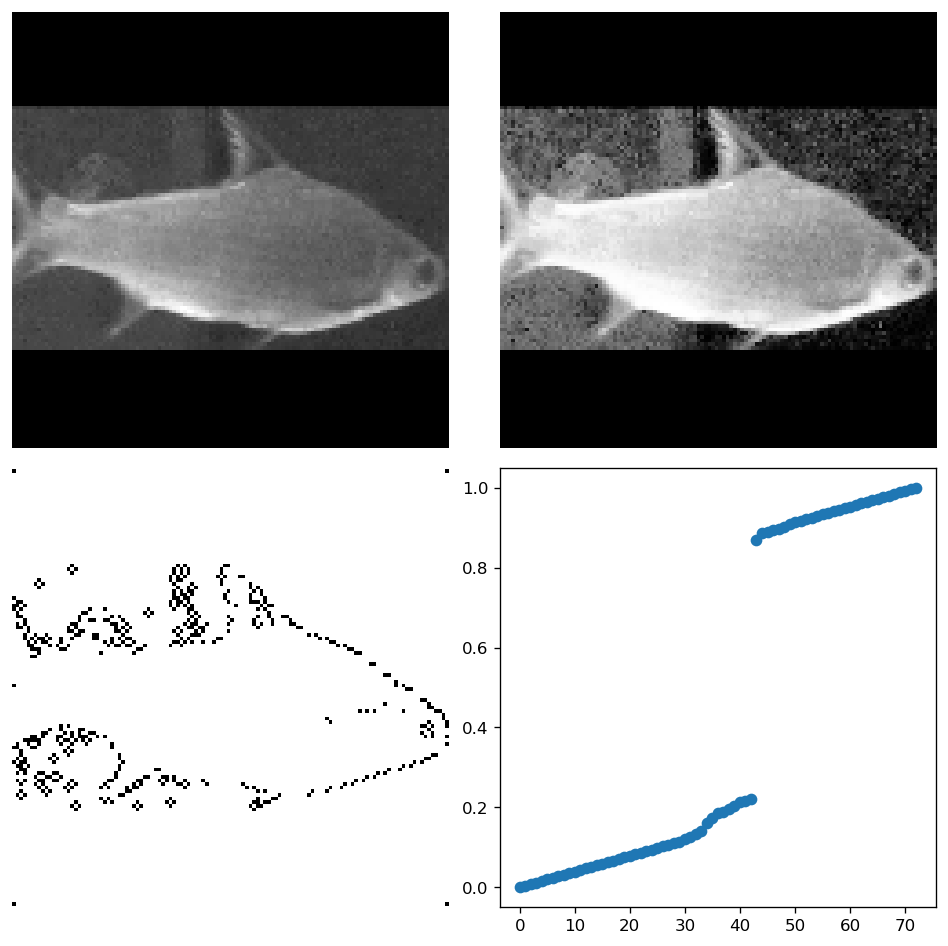

In [24]:
pos = numpy.random.randint(0, len(my_contour_image_list) - 1)
source_image = my_image_list[pos]
equal_image = cv2.equalizeHist(source_image.copy())

ret, thresh = cv2.threshold(equal_image, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_image = img_blank.copy()

contrast_slope_ratios = get_contrast_slope_ratios(my_image_list[pos])

for contour in contours:
    cv2.drawContours(contour_image, contour, -1, (0, 0, 255), 1)

fig, ax = plt.subplots(dpi=120, figsize=(8, 8), nrows=2, ncols=2)

ax[0][0].imshow(source_image, cmap='gray')
ax[0][0].axis('off')

ax[0][1].imshow(equal_image, cmap='gray')
ax[0][1].axis('off')

ax[1][0].imshow(contour_image, cmap='gray')
ax[1][0].axis('off')

ax[1][1].scatter(numpy.arange(len(contrast_slope_ratios)), contrast_slope_ratios)

plt.tight_layout()
plt.show()

In [25]:
is_low_contrast_image(source_image, fraction_threshold=0.3)

(True, 0.2901960784313726)